In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#loading data
df = pd.read_csv(r'./data/diabetes_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [3]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [5]:
df_smoke_ratios = df.groupby('smoking_history')['diabetes'].value_counts().unstack()
df_smoke_ratios
df_smoke_ratios['ratio'] = df_smoke_ratios[1] / df_smoke_ratios[0]
df_smoke_ratios

diabetes,0,1,ratio
smoking_history,,,
No Info,34362,1454,0.042314
current,8338,948,0.113696
ever,3532,472,0.133635
former,7762,1590,0.204844
never,31749,3346,0.105389
not current,5757,690,0.119854


In [6]:
# Data Preprocessing
nan_summary = df.isna().sum()
print("NaN count before processing:\n", nan_summary[nan_summary > 0])

# Separate numeric and categorical 
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder()
# df['gender'] = encoder.fit_transform(df[['gender']])
df['gender_female'] = df['gender'] == 'Female'

for col in set(df['smoking_history']):
    df['smoking_'+col] = 1*(df['smoking_history']==col)

# df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
df=df.drop(columns=['location', 'smoking_history', 'gender'])

# reorder columns
col = 'diabetes'
df = df[[c for c in df.columns if c != col] + [col]]
df

NaN count before processing:
 Series([], dtype: int64)


,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,gender_female,smoking_never,smoking_not current,smoking_No Info,smoking_current,smoking_former,smoking_ever,diabetes
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,True,1,0,0,0,0,0,0
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,True,1,0,0,0,0,0,0
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,False,1,0,0,0,0,0,0
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,False,1,0,0,0,0,0,0
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,True,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,0,0,0,0,1,0,0,21.21,6.5,90,True,1,0,0,0,0,0,0
99996,2016,80.0,0,1,0,0,0,0,0,36.66,5.7,100,True,0,0,1,0,0,0,0
99997,2018,46.0,0,1,0,0,0,0,0,36.12,6.2,158,False,0,0,0,0,0,1,0
99998,2018,51.0,1,0,0,0,0,0,0,29.29,6.0,155,True,0,1,0,0,0,0,0


<Axes: >

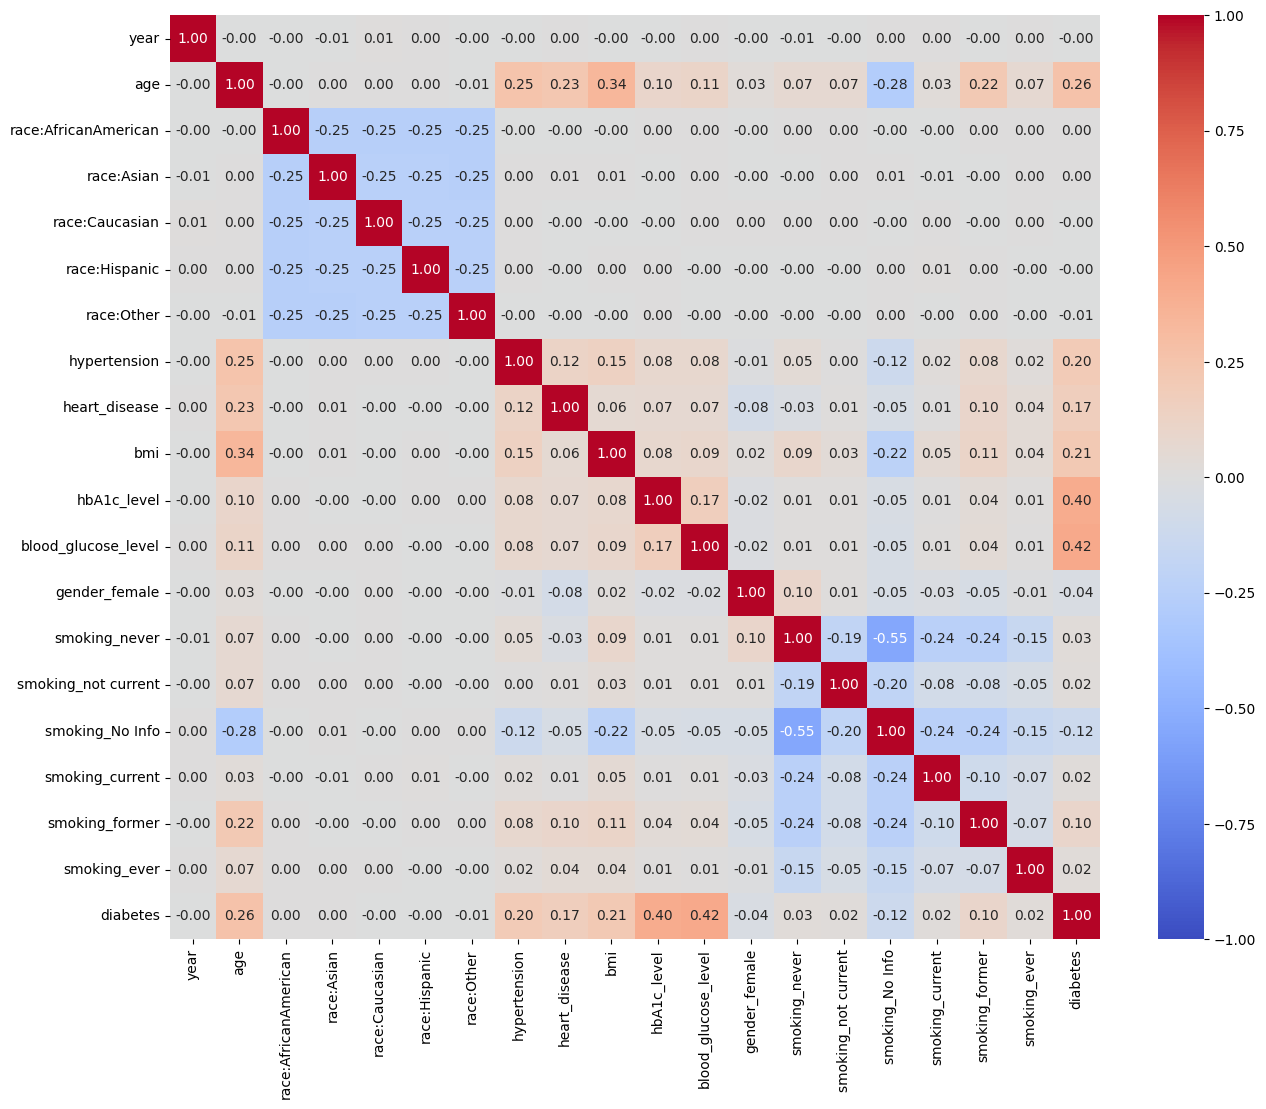

In [7]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

<Axes: >

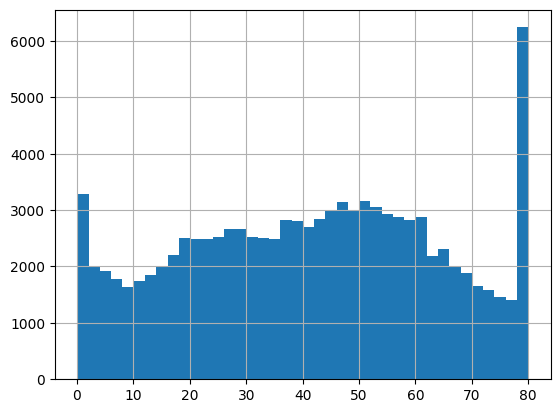

In [8]:
df.age.hist(bins=40)

<Axes: xlabel='diabetes', ylabel='count'>

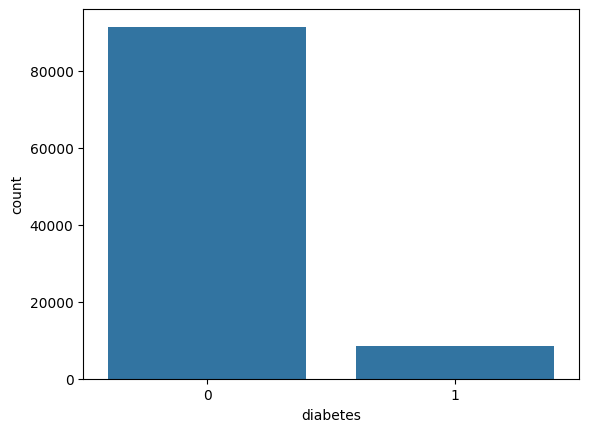

In [9]:
sns.countplot(data=df, x='diabetes')

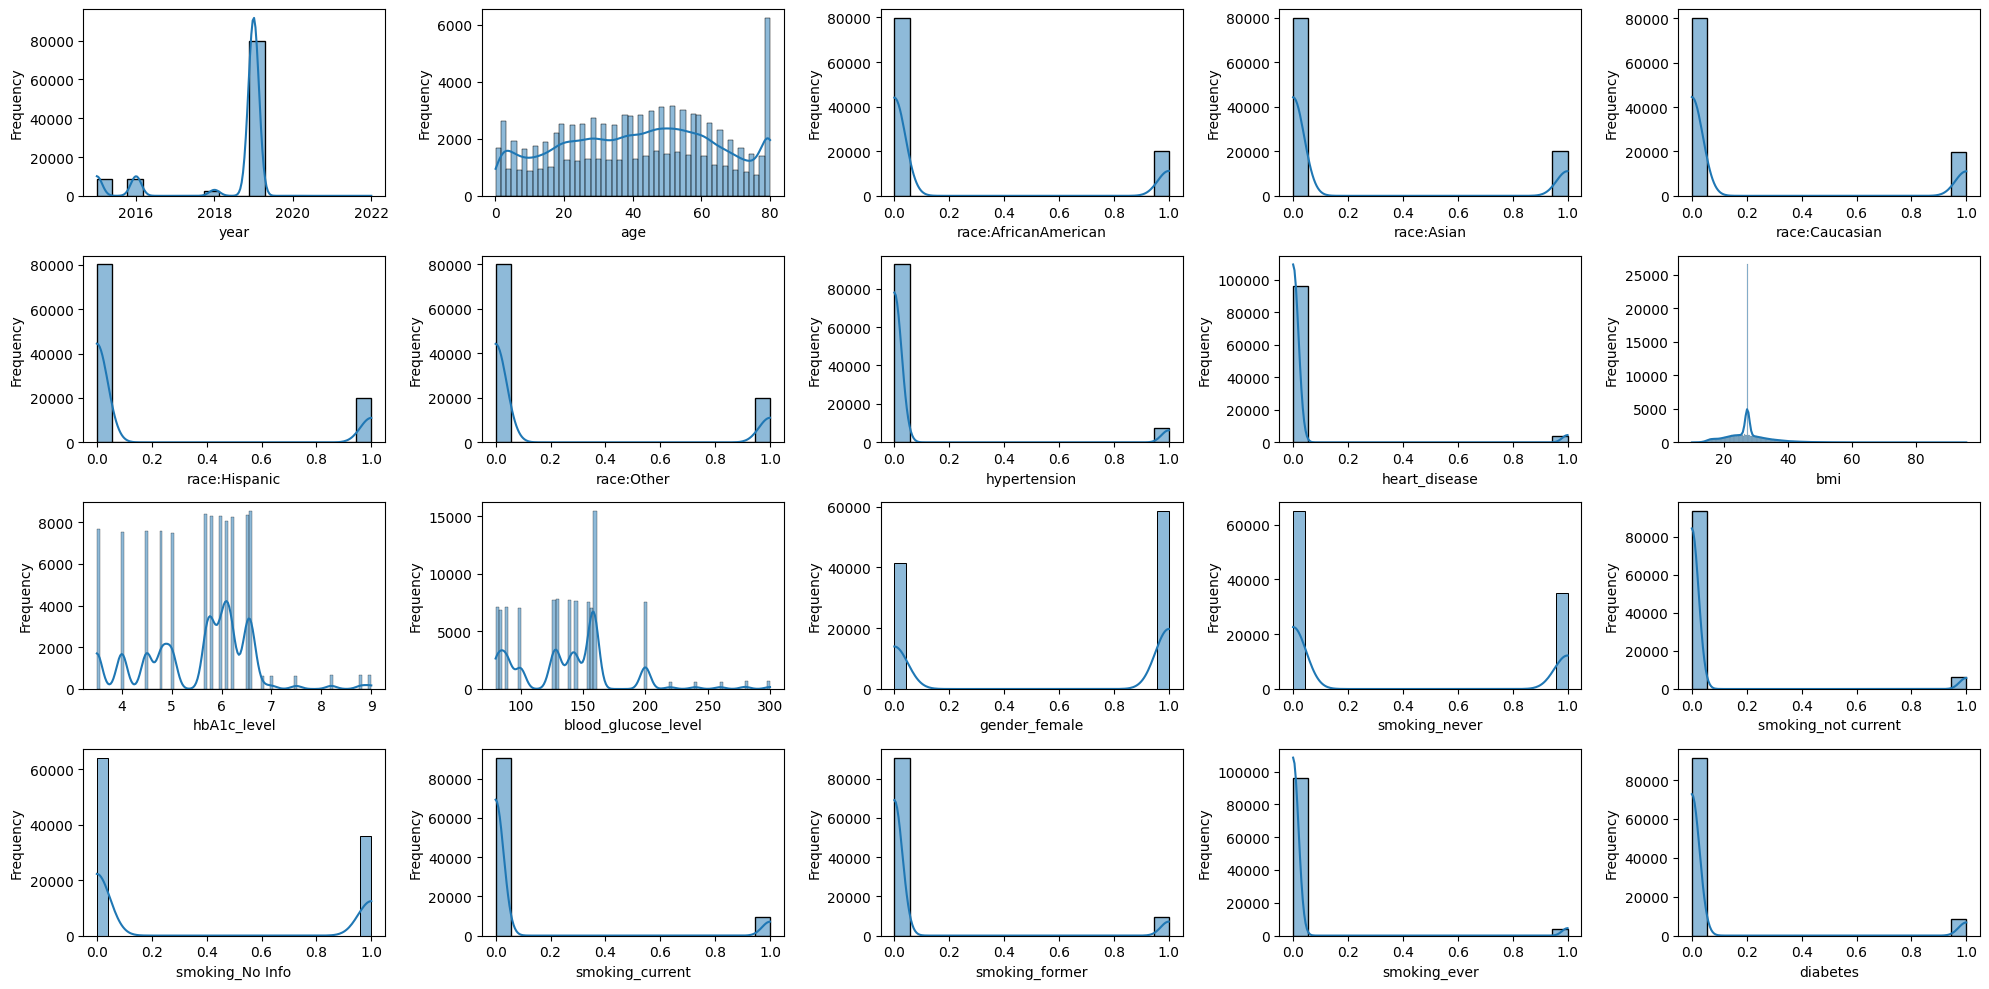

In [10]:
#Exploratory Data Analysis (EDA)

plt.figure(figsize=(20, 10))
plotnumber = 1
for column in df:
    if plotnumber <= 30:  
        ax = plt.subplot(4, 5, plotnumber)  
        sns.histplot(df[column], kde=True)  
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    plotnumber += 1

plt.tight_layout() 
plt.show()


In [11]:
# creating features and label 

X = df.drop('diabetes', axis = 1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10 , random_state = 0)

In [12]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# model predictions

y_pred = log_reg.predict(X_test)


# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, log_reg.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))

0.9603222222222222
0.9602
[[9038   79]
 [ 319  564]]


c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1) 

# Train the model
rf.fit(X_train, y_train)

# Model predictions
y_pred = rf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, rf.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))

0.9998111111111111
0.9713
[[9102   15]
 [ 272  611]]


In [28]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)


# Train the model
svm_clf.fit(X_train, y_train)

# Model predictions
y_pred = svm_clf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, rf.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))


0.9998111111111111
0.9713
[[9072   45]
 [ 351  532]]


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic',  # Use 'multi:softmax' for multiclass
                         eval_metric='logloss',       # Evaluation metric
                         use_label_encoder=False,     # Avoid warnings in new versions
                         random_state=42,
                         n_jobs=-1
                         )

# Train the model
xgb_clf.fit(X_train, y_train)

# Model predictions
y_pred = xgb_clf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, xgb_clf.predict(X_train)))  # Train accuracy
xgb_acc = accuracy_score(y_test, y_pred)  # Test accuracy
print(xgb_acc)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:41:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.9762444444444445
0.971
[[9084   33]
 [ 257  626]]


In [36]:
#Sigmoid (Platt Scaling)- Calibration method
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_calibration_curve(classifier, X_train, y_train, X_test, y_test, method='sigmoid', n_bins=10, cv='prefit'):
    """
    Apply calibration to a classifier using Sigmoid (Platt Scaling) and plot the calibration curve.
    
    Parameters:
    - classifier: Base classifier (e.g., LogisticRegression, RandomForestClassifier)
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - method: 'sigmoid' or 'isotonic' for scikitlearn-based calibration
    - n_bins: Number of bins for the calibration curve
    """
    # Apply calibration
    calibrated_clf = CalibratedClassifierCV(classifier, method=method, cv=cv)
    calibrated_clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = calibrated_clf.predict_proba(X_test)[:, 1]
    
    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=n_bins)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label=f'{classifier.__class__.__name__} ({method.capitalize()})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title(f"Calibration Curve ({method.capitalize()})")
    plt.legend()
    plt.show()

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


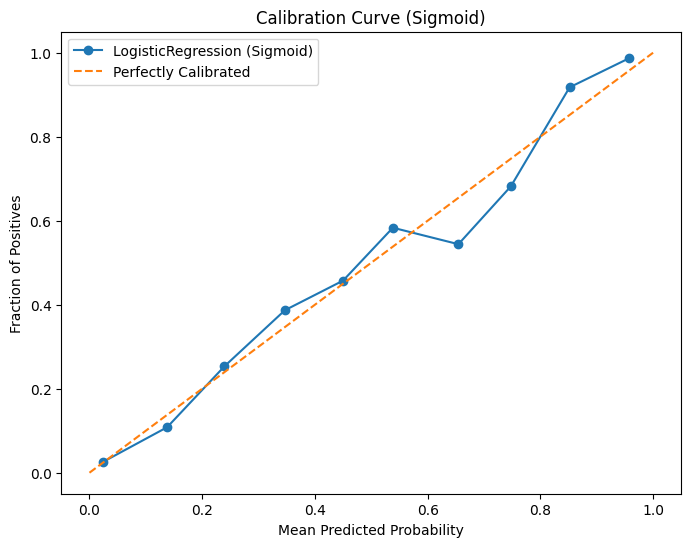

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


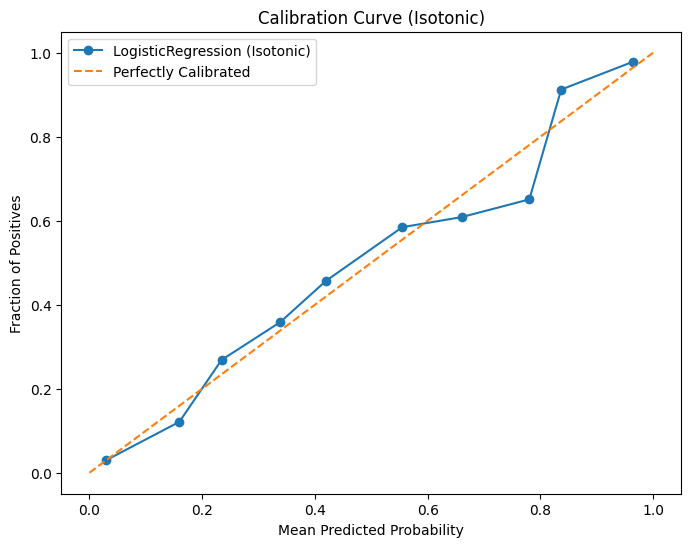

In [37]:
#Logistic Regression
# Plot calibration curve using Sigmoid (Platt Scaling)+ Isotonic
plot_calibration_curve(log_reg, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve(log_reg, X_train, y_train, X_test, y_test, method='isotonic')

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


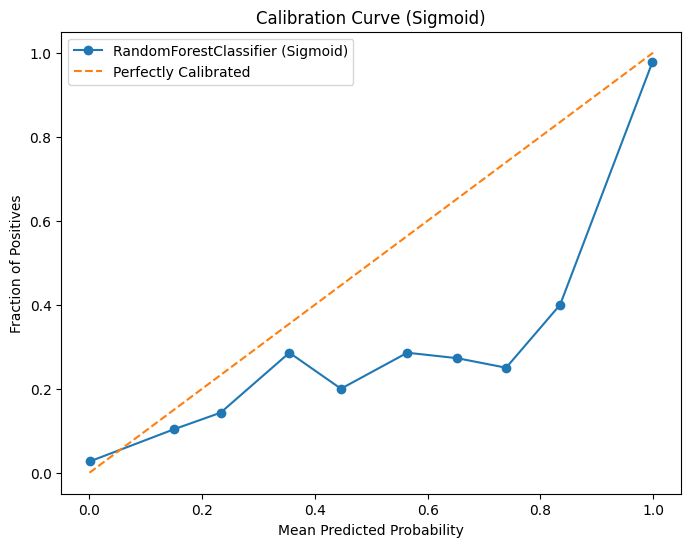

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


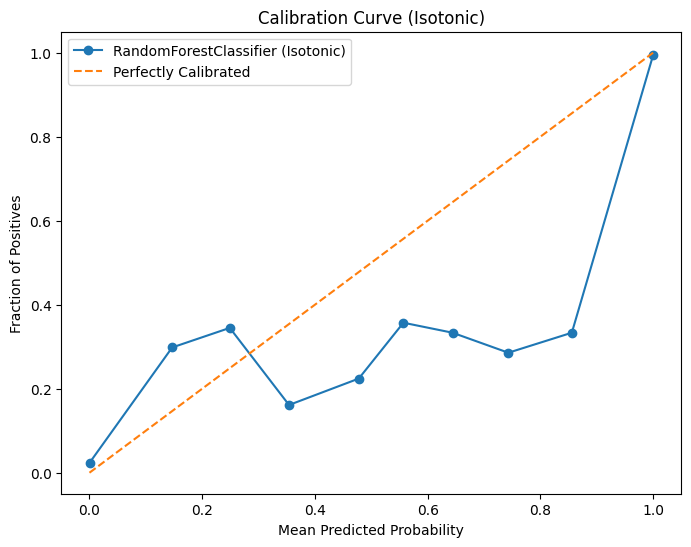

In [33]:
#Random Forest 
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve(rf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve(rf, X_train, y_train, X_test, y_test, method='isotonic')

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


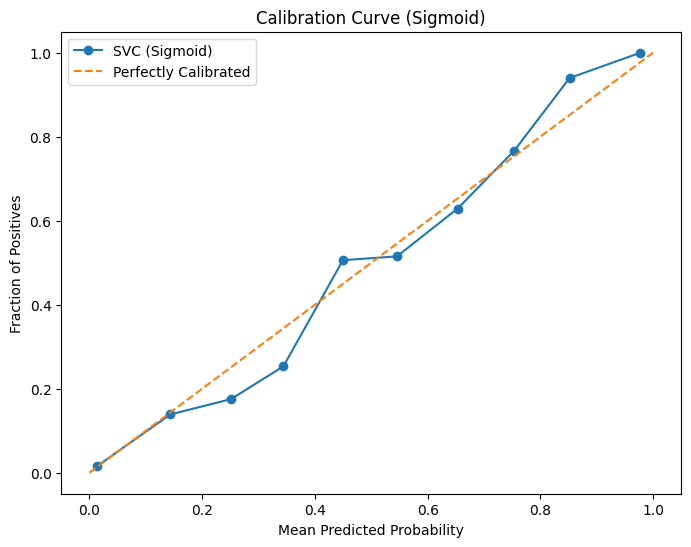

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


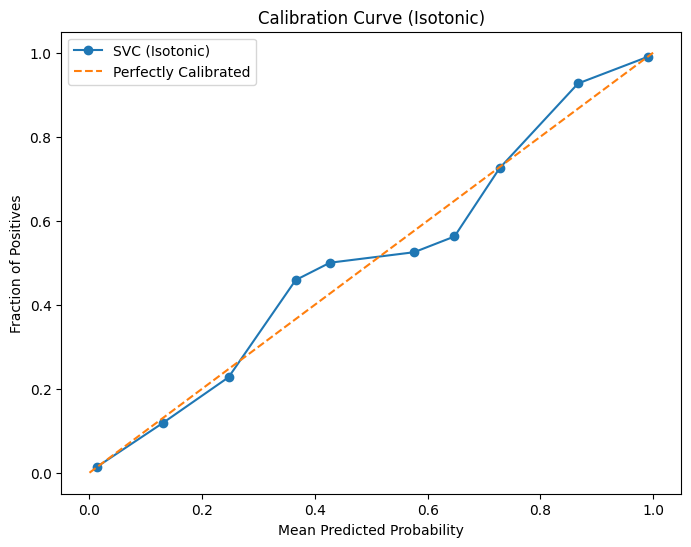

In [34]:
#SVM 
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve(svm_clf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve(svm_clf, X_train, y_train, X_test, y_test, method='isotonic')

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


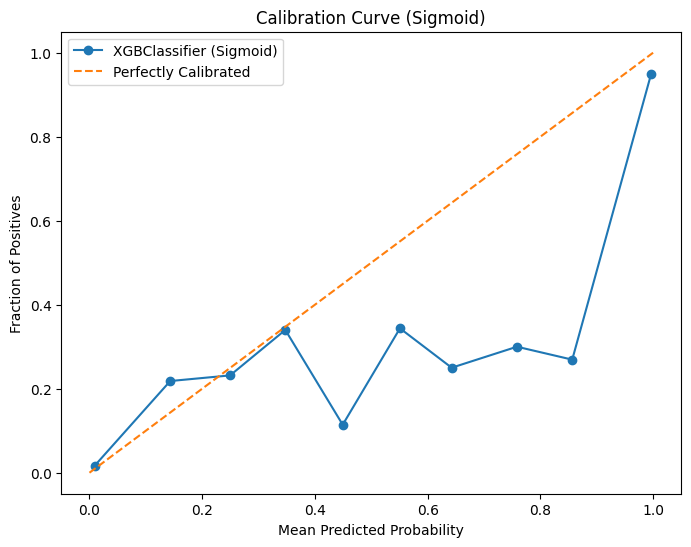

c:\Users\AsusTUF\anaconda3\envs\tru_ml_probability_calibration\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


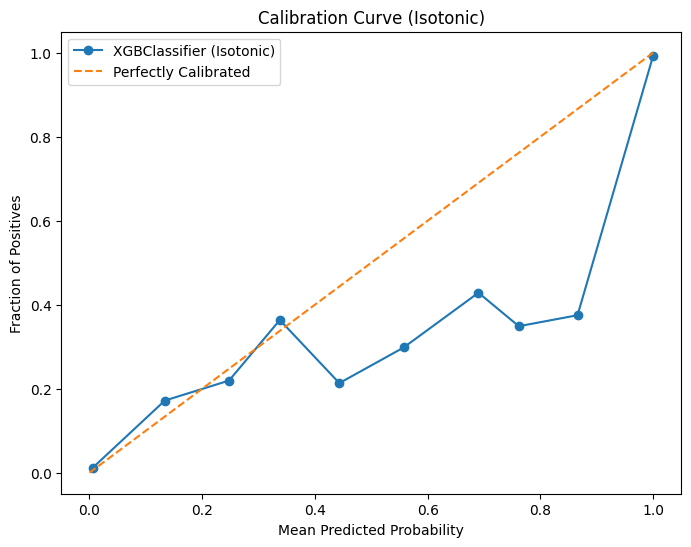

In [39]:
#XGBOOST
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve(xgb_clf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve(xgb_clf, X_train, y_train, X_test, y_test, method='isotonic')